# Overfitting and Underfitting

## Exercise 1 : Load dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=1000)


In [3]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((25000,), (25000,)), ((25000,), (25000,)))

We have 25,000 training values and 25,000 testing values. In total, we have 50,000 rows in our dataset

## Exercise 2 : Preparing the data

In [4]:
import numpy as np

In [5]:
def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [6]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [7]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((25000, 10000), (25000,)), ((25000, 10000), (25000,)))

Our training set and testing set have 25,000 rows and 10,000 columns.

## Exercise 3 : Reducing the network size

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [9]:
original_model = Sequential()
original_model.add(Dense(16, activation='relu'))
original_model.add(Dense(16, activation='relu'))
original_model.add(Dense(1, activation='sigmoid'))
original_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## Exercise 4 : Smaller model

In [10]:
smaller_model = Sequential()
smaller_model.add(Dense(4, activation='relu'))
smaller_model.add(Dense(4, activation='relu'))
smaller_model.add(Dense(1, activation='sigmoid'))
smaller_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## Exercise 5 : Fit the original model

In [11]:
original_hist = original_model.fit(
    x_train, 
    y_train, 
    batch_size = 512, 
    epochs = 20, 
    validation_data = (x_test, y_test)
)

Epoch 1/20
49/49 [==============================] - 5s 98ms/step - loss: 0.4969 - acc: 0.7856 - val_loss: 0.3965 - val_acc: 0.8404
Epoch 2/20
49/49 [==============================] - 2s 31ms/step - loss: 0.3577 - acc: 0.8571 - val_loss: 0.3362 - val_acc: 0.8615
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3263 - acc: 0.8669 - val_loss: 0.3423 - val_acc: 0.8547
Epoch 4/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3166 - acc: 0.8686 - val_loss: 0.3242 - val_acc: 0.8618
Epoch 5/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3115 - acc: 0.8711 - val_loss: 0.3252 - val_acc: 0.8621
Epoch 6/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3093 - acc: 0.8694 - val_loss: 0.3256 - val_acc: 0.8609
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3060 - acc: 0.8724 - val_loss: 0.3251 - val_acc: 0.8615
Epoch 8/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3012 - a

## Exercise 6 : Fit the smaller model

In [12]:
smaller_hist = smaller_model.fit(
    x_train, 
    y_train, 
    batch_size = 512, 
    epochs = 20, 
    validation_data = (x_test, y_test)
)

Epoch 1/20
49/49 [==============================] - 3s 69ms/step - loss: 0.5791 - acc: 0.7767 - val_loss: 0.4924 - val_acc: 0.8319
Epoch 2/20
49/49 [==============================] - 2s 32ms/step - loss: 0.4368 - acc: 0.8438 - val_loss: 0.4022 - val_acc: 0.8466
Epoch 3/20
49/49 [==============================] - 2s 32ms/step - loss: 0.3686 - acc: 0.8586 - val_loss: 0.3568 - val_acc: 0.8560
Epoch 4/20
49/49 [==============================] - 2s 32ms/step - loss: 0.3350 - acc: 0.8666 - val_loss: 0.3420 - val_acc: 0.8575
Epoch 5/20
49/49 [==============================] - 2s 31ms/step - loss: 0.3190 - acc: 0.8693 - val_loss: 0.3313 - val_acc: 0.8612
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 0.3105 - acc: 0.8718 - val_loss: 0.3265 - val_acc: 0.8626
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3063 - acc: 0.8736 - val_loss: 0.3276 - val_acc: 0.8624
Epoch 8/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3029 - a

## Exercise 7 : Get val_loss

In [13]:
original_loss = original_hist.history['val_loss']
small_loss = smaller_hist.history['val_loss']

## Exercise 8 : Plot the validation loss

In [14]:
import matplotlib.pyplot as plt

In [15]:
def plot_hist(y, original, labels, n_epoch=20, figsize=(12, 8)):
    x_range = np.arange(1, n_epoch + 1, 1, "int16")
    
    plt.figure(figsize=(12, 8))
    plt.plot(x_range, original, linestyle='dashed', marker='p', label=labels[1])
    plt.plot(x_range, y, linestyle='dashed', marker='o', label=labels[0])
    plt.xlabel('epochs')
    plt.ylabel('validation loss')
    plt.xticks(x_range)
    plt.legend()
    plt.grid(b=True, which='major', color='#bdc3c7', linestyle='-')
    plt.show()

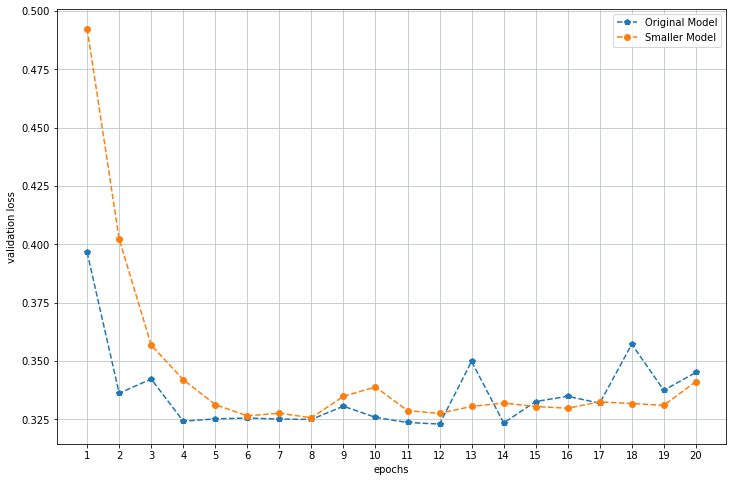

In [16]:
plot_hist(small_loss, original_loss, labels= ['Smaller Model', 'Original Model'])

## Exercise 9: Bigger model

In [17]:
bigger_model = Sequential()
bigger_model.add(Dense(512, activation='relu'))
bigger_model.add(Dense(512, activation='relu'))
bigger_model.add(Dense(1, activation='sigmoid'))
bigger_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## Exercise 10: Fit the bigger model

In [18]:
bigger_hist = bigger_model.fit(
    x_train, 
    y_train, 
    batch_size = 512, 
    epochs = 20, 
    validation_data = (x_test, y_test)
)

Epoch 1/20
49/49 [==============================] - 17s 341ms/step - loss: 0.5273 - acc: 0.7577 - val_loss: 0.4001 - val_acc: 0.8354
Epoch 2/20
49/49 [==============================] - 11s 215ms/step - loss: 0.3438 - acc: 0.8532 - val_loss: 0.3344 - val_acc: 0.8519
Epoch 3/20
49/49 [==============================] - 10s 207ms/step - loss: 0.3109 - acc: 0.8648 - val_loss: 0.3375 - val_acc: 0.8582
Epoch 4/20
49/49 [==============================] - 10s 201ms/step - loss: 0.2637 - acc: 0.8906 - val_loss: 0.4236 - val_acc: 0.8199
Epoch 5/20
49/49 [==============================] - 10s 199ms/step - loss: 0.2040 - acc: 0.9198 - val_loss: 0.4233 - val_acc: 0.8255
Epoch 6/20
49/49 [==============================] - 10s 200ms/step - loss: 0.1457 - acc: 0.9479 - val_loss: 0.4199 - val_acc: 0.8407
Epoch 7/20
49/49 [==============================] - 10s 196ms/step - loss: 0.1009 - acc: 0.9685 - val_loss: 0.4505 - val_acc: 0.8562
Epoch 8/20
49/49 [==============================] - 10s 205ms/step - 

## Exercise 11: Plot the bigger and original validation loss

In [19]:
big_loss = bigger_hist.history['val_loss']

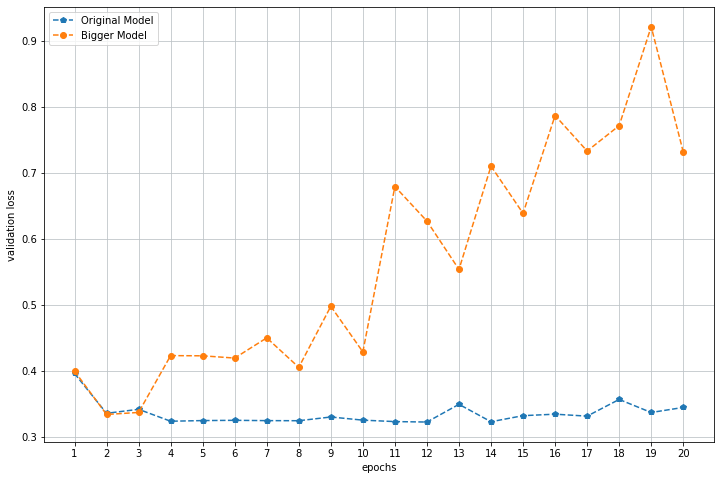

In [20]:
plot_hist(big_loss, original_loss, labels= ['Bigger Model', 'Original Model'])

*Note:
The more capacity the network has, the quicker it
will be able to model the training data, but if it converges quickly to 0, this is
more susceptible for overfitting!* 

## Exercise 12: Weight regularization

In [21]:
from tensorflow.keras import regularizers

In [22]:
l2_model = Sequential()
l2_model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
l2_model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
l2_model.add(Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## Exercise 13: Fit L2 model

In [23]:
l2_model_hist = l2_model.fit(
    x_train, 
    y_train, 
    batch_size = 512, 
    epochs = 20, 
    validation_data = (x_test, y_test)
)

Epoch 1/20
49/49 [==============================] - 12s 247ms/step - loss: 0.5681 - acc: 0.7593 - val_loss: 0.4617 - val_acc: 0.8424
Epoch 2/20
49/49 [==============================] - 4s 72ms/step - loss: 0.4083 - acc: 0.8548 - val_loss: 0.3973 - val_acc: 0.8432
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3611 - acc: 0.8644 - val_loss: 0.3619 - val_acc: 0.8607
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3456 - acc: 0.8682 - val_loss: 0.3544 - val_acc: 0.8612
Epoch 5/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3400 - acc: 0.8696 - val_loss: 0.3819 - val_acc: 0.8474
Epoch 6/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3364 - acc: 0.8706 - val_loss: 0.3498 - val_acc: 0.8618
Epoch 7/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3346 - acc: 0.8722 - val_loss: 0.3545 - val_acc: 0.8598
Epoch 8/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3357 -

## Exercise 14: Plot L2 and Original model

In [24]:
l2_loss = l2_model_hist.history['val_loss']

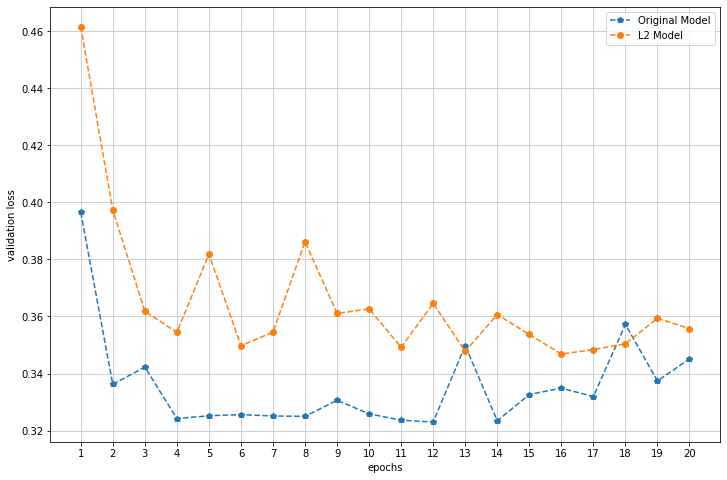

In [25]:
plot_hist(l2_loss, original_loss, labels= ['L2 Model', 'Original Model'])

## Exercise 15: Adding Dropout

In [26]:
dpt_model = Sequential()

dpt_model.add(Dense(16, activation='relu'))
dpt_model.add(Dropout(0.5))

dpt_model.add(Dense(16, activation='relu'))
dpt_model.add(Dropout(0.5))

dpt_model.add(Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

## Exercise 16: Fit DropOut Model

In [27]:
dpt_hist = dpt_model.fit(
    x_train, 
    y_train, 
    batch_size = 512, 
    epochs = 20, 
    validation_data = (x_test, y_test)
)

Epoch 1/20
49/49 [==============================] - 15s 301ms/step - loss: 0.6169 - acc: 0.6526 - val_loss: 0.4995 - val_acc: 0.8348
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.5065 - acc: 0.7755 - val_loss: 0.4061 - val_acc: 0.8524
Epoch 3/20
49/49 [==============================] - 2s 42ms/step - loss: 0.4435 - acc: 0.8250 - val_loss: 0.3667 - val_acc: 0.8567
Epoch 4/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4056 - acc: 0.8468 - val_loss: 0.3417 - val_acc: 0.8622
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3863 - acc: 0.8577 - val_loss: 0.3313 - val_acc: 0.8621
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3693 - acc: 0.8624 - val_loss: 0.3337 - val_acc: 0.8614
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3567 - acc: 0.8664 - val_loss: 0.3321 - val_acc: 0.8512
Epoch 8/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3497 -

## Exercise 17: Plot Drop out and Original

In [28]:
dpt_loss = dpt_hist.history['val_loss']

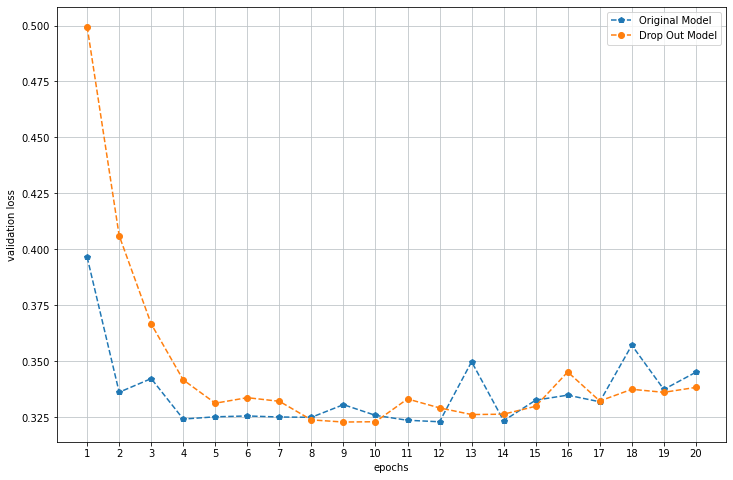

In [29]:
plot_hist(dpt_loss, original_loss, labels= ['Drop Out Model', 'Original Model'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62eda4a8-d26a-4a56-8c6c-5473bb99037f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>